In [ ]:
#Project - 01 DSML Project SEPM Project

In [ ]:
#Installing required packages:
!pip install resume-parser
!pip install https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-2.3.1/en_core_web_sm-2.3.1.tar.gz
!pip install importlib-metadata==3.2.0


In [ ]:
import nltk
import spacy

# !python -m spacy download en_core_web_sm
# !python -m nltk.downloader stopwords
# !python -m nltk.downloader averaged_perceptron_tagger
# !python -m nltk.downloader punkt
# !python -m nltk.downloader universal_tagset
# !python -m nltk.downloader wordnet
# !python -m nltk.downloader brown
# !python -m nltk.downloader maxent_ne_chunker

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from pandas.plotting import scatter_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [ ]:
#Resume Cleaning (Data Preprocessing)
resumeDataSet = pd.read_csv(r'resume_dataset.csv',encoding='utf-8')
resumeDataSet['cleaned_resume'] = ''
resumeDataSet.head()

,Category,Resume,cleaned_resume
0,Data Science,Skills * Programming Languages: Python (pandas...,
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",


In [ ]:
print ("Displaying the distinct Category of resume and the number of records belonging to each category:\n\n")
print (resumeDataSet['Category'].value_counts())

Displaying the distinct Category of resume and the number of records belonging to each category:


Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: Category, dtype: int64


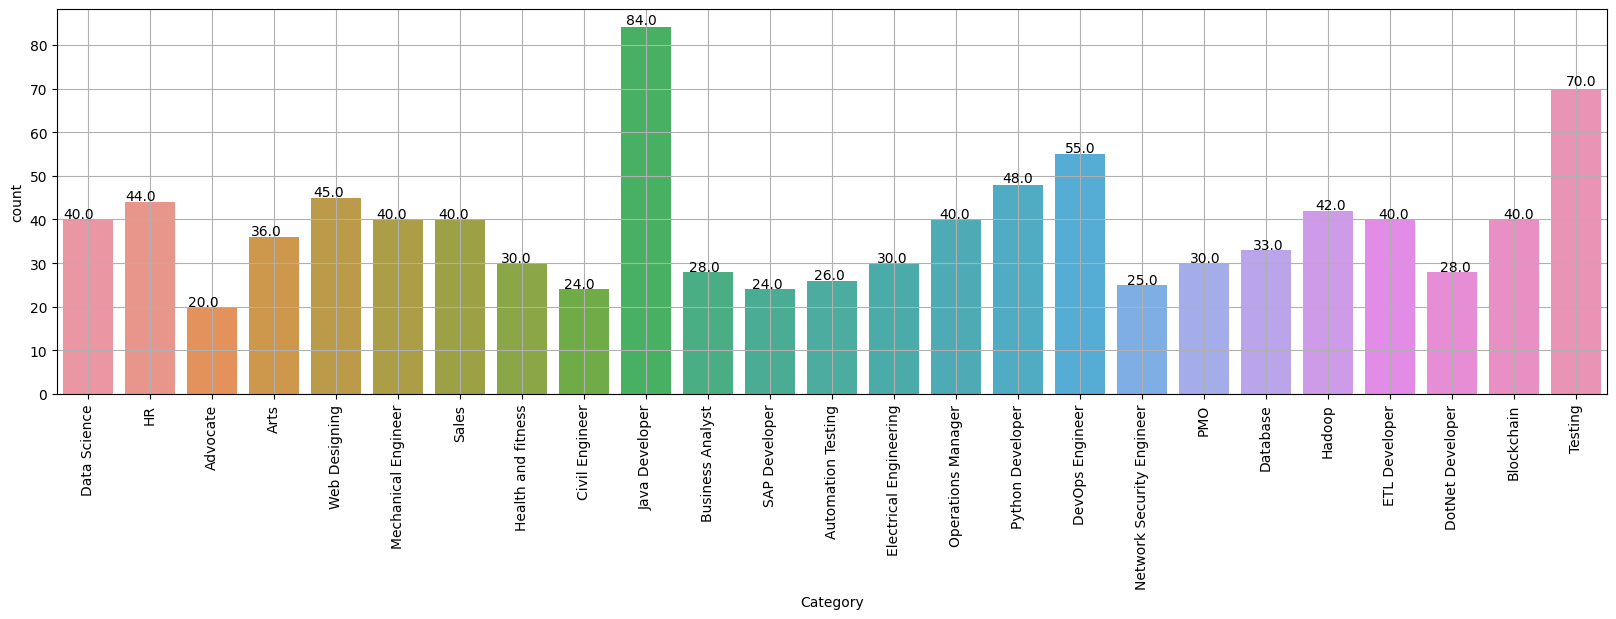

In [ ]:
plt.figure(figsize=(20,5))
plt.xticks(rotation=90)
ax=sns.countplot(x="Category", data=resumeDataSet)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.grid()

In [ ]:
import re
def cleanResume(resumeText):
    resumeText = re.sub('http\S+\s*', ' ', resumeText)
    resumeText = re.sub('RT|cc', ' ', resumeText)
    resumeText = re.sub('#\S+', '', resumeText)
    resumeText = re.sub('@\S+', '  ', resumeText)
    resumeText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', resumeText)
    resumeText = re.sub(r'[^\x00-\x7f]',r' ', resumeText)
    resumeText = re.sub('\s+', ' ', resumeText)
    return resumeText

resumeDataSet['cleaned_resume'] = resumeDataSet.Resume.apply(lambda x: cleanResume(x))

In [ ]:
print(resumeDataSet['cleaned_resume'])

0      Skills Programming Languages Python pandas num...
1      Education Details May 2013 to May 2017 B E UIT...
2      Areas of Interest Deep Learning Control System...
3      Skills R Python SAP HANA Tableau SAP HANA SQL ...
4      Education Details MCA YMCAUST Faridabad Haryan...
                             ...                        
957    Computer Skills Proficient in MS office Word B...
958     Willingness to a ept the challenges Positive ...
959    PERSONAL SKILLS Quick learner Eagerness to lea...
960    COMPUTER SKILLS SOFTWARE KNOWLEDGE MS Power Po...
961    Skill Set OS Windows XP 7 8 8 1 10 Database MY...
Name: cleaned_resume, Length: 962, dtype: object


In [ ]:
# Skills Dataset Preprocessing:
skills_data = pd.read_csv(r'skills.csv',encoding='utf-8')
# Assuming your CSV file is named 'skills.csv'
csv_file_path = skills_data

# Read the CSV file into a pandas DataFrame
df = pd.read_csv(r'skills.csv', header=None)

# Define the content to be dropped
content_to_drop = "['Missing']"

# Filter rows that do not contain the specified content
df_filtered = df[df.apply(lambda row: content_to_drop not in row.values, axis=1)]

# Save the filtered DataFrame back to the CSV file
df_filtered.to_csv('filtered_skills.csv', header=False, index=False)

# Display the filtered DataFrame
print(df_filtered)

                                                     0
0    ['Data Science', 'Machine Learning', 'Python P...
1    ['Data Science', 'Python Programming', 'Rstudi...
2    ['Json', 'Xml', 'Python Programming', 'Databas...
3    ['Binary Code', 'Customer Support', 'Linux', '...
4    ['Tensorflow', 'Convolutional Neural Network',...
..                                                 ...
990  ['Legality of cannabis', 'CBD and THC', 'Publi...
992  ['Computer Programming', 'C++17', 'Algorithms'...
995  ['Strategic Management', 'Strategic Thinking',...
998  ['Cryptosystem', 'Cryptographic Hash Function ...
999  ['Logic Programming', 'Java Programming', 'Obj...

[729 rows x 1 columns]


In [ ]:
#Processing the skills dataset
import string
# Read the CSV file
skills_dataset = pd.read_csv('/content/skills.csv', encoding='utf-8')

# Define a function to clean the skills
def clean_skills(skill_list):
    cleaned_skills = []
    for skill in skill_list:
        # Convert to lowercase
        skill = skill.lower()
        # Remove punctuation
        skill = skill.translate(str.maketrans('', '', string.punctuation))
        # Split words
        words = skill.split()
        cleaned_skills.extend(words)
    return cleaned_skills

# Apply the cleaning function to each row in the dataset
skills_dataset['cleaned_skills'] = skills_dataset.apply(lambda row: clean_skills(row), axis=1)

# Drop the original skills column if needed
# skills_dataset = skills_dataset.drop(columns=['Skills'])

# Display the cleaned dataset
print(skills_dataset['cleaned_skills'])




In [ ]:
#!pip install nltk
!python -m nltk.downloader stopwords -d ~/nltk_data
import re
import nltk
from nltk.corpus import stopwords
# Create a list of stop words
stop_words = set(stopwords.words('english'))

list_of_lists = skills_dataset['cleaned_skills']
flat_list = []
for sublist in list_of_lists:
    for item in sublist:
        flat_list.append(item)

print(len(flat_list))

unique_elements = set()

# Iterate over the input list
for element in flat_list:
    # Check if the element is already in the set
    if element not in unique_elements:
        # Add the element to the set
        unique_elements.add(element)
# Convert the set back to a list
unique_list = list(unique_elements)

print(unique_list)

flat_list=list(unique_list)

#Removing stop words from list
flat_list = [word for word in flat_list if word not in stop_words]
print(len(flat_list))

In [ ]:
#Preparing the new column in resume dataset with skills keywords:
from difflib import SequenceMatcher
import hashlib

resumeDataSet['cleaned_resume']=resumeDataSet['cleaned_resume'].str.split()


skills_hash = {}
for skill in flat_list:
    skills_hash[hashlib.md5(skill.encode('utf-8')).hexdigest()] = True

resumeDataSet['skills'] = [[] for _ in range(962)]

for k in range(len(resumeDataSet['cleaned_resume'])):
    temp = set()
    for i in resumeDataSet['cleaned_resume'][k]:
        skill_hash = hashlib.md5(i.encode('utf-8')).hexdigest()
        if skill_hash in skills_hash:
            temp.add(i)

    for t in temp:
        resumeDataSet['skills'][k].append(t)

print(resumeDataSet['skills'])


0      [user, numpy, flow, red, models, data, portfol...
1      [value, research, selection, time, meta, descr...
2      [based, value, target, business, segmentation,...
3      [user, infrastructure, flow, project, view, mo...
4                                 [company, description]
                             ...                        
957    [knowledge, positive, description, test, attit...
958    [quality, satisfaction, plan, knowledge, issue...
959    [inspection, new, time, organizational, learn,...
960                 [company, system, description, wind]
961    [user, test, quality, 7, sql, meeting, summary...
Name: skills, Length: 962, dtype: object


In [ ]:
resumeDataSet.to_csv('/content/resume_dataset.csv')
print(resumeDataSet['skills'])

0      [user, numpy, flow, red, models, data, portfol...
1      [value, research, selection, time, meta, descr...
2      [based, value, target, business, segmentation,...
3      [user, infrastructure, flow, project, view, mo...
4                                 [company, description]
                             ...                        
957    [knowledge, positive, description, test, attit...
958    [quality, satisfaction, plan, knowledge, issue...
959    [inspection, new, time, organizational, learn,...
960                 [company, system, description, wind]
961    [user, test, quality, 7, sql, meeting, summary...
Name: skills, Length: 962, dtype: object


In [ ]:

# Create an empty dictionary to store the final dataset
final_dataset = {'Category': [], 'Skills': []}

# Iterate over each category in the resume dataset
for category in resumeDataSet['Category'].unique():
    # Filter the resume dataset for the current category
    category_data = resumeDataSet[resumeDataSet['Category'] == category]

    # Extract all skills for the current category
    freq = {}
    for skills_list in category_data['skills']:
        for skill in skills_list:
            element = skill.lower()
            if element in freq:
                freq[element] += 1
            else:
                freq[element] = 1

    # Sort the dictionary by frequency in descending order
    sorted_dict = dict(sorted(freq.items(), key=lambda item: item[1], reverse=True))

    # Append the category and sorted list of skills to the final dataset
    final_dataset['Category'].append(category)
    final_dataset['Skills'].append(list(sorted_dict.keys()))

# Create a DataFrame from the final dataset
final_df = pd.DataFrame(final_dataset)

# Save the final dataset to a CSV file
final_df.to_csv('final.csv', index=False)


In [ ]:
final_data=pd.read_csv('/content/final.csv')
final_data.head()

,Category,Skills
0,Data Science,"['company', 'description', 'data', 'learning',..."
1,HR,"['company', 'description', 'basic', 'managemen..."
2,Advocate,"['company', 'description', 'legal', 'law', 'pe..."
3,Arts,"['company', 'description', 'knowledge', 'arts'..."
4,Web Designing,"['description', 'company', 'user', 'applicatio..."


In [ ]:
final_data['Skills'][0]=[
    'Python',
    'R',
    'Data Analysis',
    'Machine Learning',
    'Statistical Modeling',
    'Data Visualization',
    'SQL',
    'Big Data',
    'Data Mining',
    'Predictive Modeling',
    'Feature Engineering',
    'Natural Language Processing',
    'Deep Learning',
    'TensorFlow',
    'PyTorch',
    'Scikit-learn',
    'Pandas',
    'NumPy',
    'SciPy',
    'Matplotlib',
    'Seaborn',
    'Plotly',
    'Bokeh',
    'D3.js',
    'Tableau',
    'Power BI',
    'Data Wrangling',
    'ETL (Extract, Transform, Load)',
    'Data Cleaning',
    'Data Preprocessing',
    'Dimensionality Reduction',
    'Clustering',
    'Classification',
    'Regression Analysis',
    'Time Series Analysis',
    'Cross-validation',
    'Hyperparameter Tuning',
    'Ensemble Learning',
    'Random Forest',
    'Gradient Boosting',
    'Neural Networks',
    'Data Engineering',
    'Hadoop',
    'Spark',
    'MapReduce',
    'Distributed Computing',
    'AWS',
    'Azure',
    'Google Cloud Platform',
    'Docker',
    'Kubernetes',
    'Version Control (Git)',
    'Jupyter Notebooks',
    'Collaborative Coding',
    'Agile Methodology',
    'Scrum',
    'Statistics',
    'Probability',
    'A/B Testing',
    'Hypothesis Testing',
    'Bayesian Methods',
    'Experimental Design',
    'Time Complexity',
    'Optimization',
    'Linear Algebra',
    'Calculus',
    'Computer Science Fundamentals',
    'Algorithm Design',
    'Data Structures',
    'Database Management',
    'SQLAlchemy',
    'NoSQL Databases',
    'MongoDB',
    'Cassandra',
    'Communication Skills',
    'Presentation Skills',
    'Business Acumen',
    'Problem Solving',
    'Critical Thinking',
    'Project Management',
    'Collaboration',
    'Interdisciplinary Knowledge',
    'Domain Knowledge',
    'Healthcare Analytics',
    'Finance Analytics',
    'Marketing Analytics',
    'Supply Chain Analytics',
    'Social Media Analytics',
    'Cybersecurity Analytics',
    'IoT Analytics',
    'Geospatial Analytics',
    'Ethical Data Practices',
    'Continuous Learning',
    'Curiosity',
    'Adaptability',
    'Teamwork',
    'Leadership',
    'Client Interaction',
    'Mentoring',
    'Technical Writing',
]

In [ ]:
print(final_data['Skills'][0])

['Python', 'R', 'Data Analysis', 'Machine Learning', 'Statistical Modeling', 'Data Visualization', 'SQL', 'Big Data', 'Data Mining', 'Predictive Modeling', 'Feature Engineering', 'Natural Language Processing', 'Deep Learning', 'TensorFlow', 'PyTorch', 'Scikit-learn', 'Pandas', 'NumPy', 'SciPy', 'Matplotlib', 'Seaborn', 'Plotly', 'Bokeh', 'D3.js', 'Tableau', 'Power BI', 'Data Wrangling', 'ETL (Extract, Transform, Load)', 'Data Cleaning', 'Data Preprocessing', 'Dimensionality Reduction', 'Clustering', 'Classification', 'Regression Analysis', 'Time Series Analysis', 'Cross-validation', 'Hyperparameter Tuning', 'Ensemble Learning', 'Random Forest', 'Gradient Boosting', 'Neural Networks', 'Data Engineering', 'Hadoop', 'Spark', 'MapReduce', 'Distributed Computing', 'AWS', 'Azure', 'Google Cloud Platform', 'Docker', 'Kubernetes', 'Version Control (Git)', 'Jupyter Notebooks', 'Collaborative Coding', 'Agile Methodology', 'Scrum', 'Statistics', 'Probability', 'A/B Testing', 'Hypothesis Testing',

In [ ]:
# This is Resume parsing model (Internal traning included)
from resume_parser import resumeparse

In [ ]:
data = resumeparse.read_file(r'/content/Data_science.pdf')
print(data)

{'email': 'info@qwikresume.com', 'phone': '', 'name': 'Data Scientist', 'total_exp': 12, 'university': [], 'designition': ['data scientist', 'scientist'], 'degree': ['PhD in Physics and 1', '©', 'PhD'], 'skills': ['Data Mining', ' Data Analysis', ' Machine Learning', ' Python', ' R', ' MATLAB', ' Sphinx', ' LaTeX', ' Mathematica', '', 'Maple', ' GIT', ' CVS', ' HTCondor.'], 'Companies worked at': []}


In [ ]:
#Parsed resume details (USER)
print("Name of User: ", data['name'])
print("Designation of User: ", data['designition'][0])
print("Email of User: ", data['email'])
print("Skills of User: ", data['skills'])

Name of User:  Data Scientist
Designation of User:  data scientist
Email of User:  info@qwikresume.com
Skills of User:  ['Data Mining', ' Data Analysis', ' Machine Learning', ' Python', ' R', ' MATLAB', ' Sphinx', ' LaTeX', ' Mathematica', '', 'Maple', ' GIT', ' CVS', ' HTCondor.']


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

def calculate_similarity(list1, list2, thresh=0.2):
    # Convert lists to strings
    str1 = ' '.join(map(str, list1))
    str2 = ' '.join(map(str, list2))

    # Create vectors for each list using a bag-of-words representation
    vectorizer = CountVectorizer().fit_transform([str1, str2])

    # Calculate the cosine similarity between the two vectors
    cosine_sim = cosine_similarity(vectorizer)

    # Since cosine similarity ranges from -1 to 1, normalize it to a 0 to 1 scale
    normalized_similarity = 0.5 * (cosine_sim[0, 1] + 1)

    # Apply the threshold
    similarity_with_thresh = max(normalized_similarity, thresh)

    return similarity_with_thresh


In [ ]:
#!pip install fuzzywuzzy
from fuzzywuzzy import fuzz

def find_similar_category(input_category, categories):
    similarities = [(category, fuzz.ratio(input_category, category)) for category in categories]
    most_similar = max(similarities, key=lambda x: x[1])

    most_similar_category = most_similar[0]
    similarity_score = most_similar[1]

    # Find the index of the most similar category
    index_of_most_similar = categories.tolist().index(most_similar_category)

    return most_similar_category, similarity_score, index_of_most_similar

# Example usage
input_category = 'artts'  # Replace with your desired category
categories = resumeDataSet['Category'].unique()

most_similar_category, similarity_score, index_of_most_similar = find_similar_category(input_category, categories)

print(f"Most similar category: {most_similar_category}, Similarity score: {similarity_score}")
print(f"Index of the most similar category: {index_of_most_similar}")
print(resumeDataSet['skills'][index_of_most_similar])


Most similar category: Arts, Similarity score: 67
Index of the most similar category: 3
['user', 'infrastructure', 'flow', 'project', 'view', 'models', 'interface', 'knowledge', 'data', 'product', 'team', 'production', 'processing', 'company', 'reporting', 'tuning', 'customer', 'specification', 'design', 'text', 'decision', 'information', 'state', 'analysis', 'new', 'transfer', 'open', 'taking', 'description', 'development', 'using', 'initiative', 'forecast', 'tableau', 'performance', 'care', 'support', 'modelling', 'develop', 'database', 'creation', 'tree', 'reduction', 'requirements', 'activities', 'tool', 'insights', 'setting', 'algorithms', 'learning', 'course', 'capture', 'future', 'query', 'developing', 'analytical', 'historic', 'reports', 'leading', 'planning', 'client', 'capabilities', 'core', 'effort', 'forecasting', 'building', 'understanding', 'time', 'recognition', 'digital', 'financial', 'base', 'cluster', 'mapping', 'documents', 'deployments', 'analytics', 'business', 'pr

In [ ]:
def calculate_resume_score(data):

    # Adjusted weights for each factor
    skill_weight = 0.5
    recent_experience_weight = 0.15
    total_experience_weight = 0.1
    education_weight = 0.15
    other_factors_weight = 0.1

    # Extract relevant information from the resume_data dictionary
    skills = data.get('skills', [])
    total_experience = data.get('total_exp', 0)
    recent_experience = data.get('recent_exp', 0)
    education = data.get('degree', [])

    # Define other factors (add more factors as needed)
    other_factors = 0
    # Example: Add points for having a PhD
    if 'PhD' in ' '.join(education):
        other_factors += 5

    # Calculate scores for each factor
    most_similar_category, similarity_score, index_of_most_similar = find_similar_category(data['designition'][0], resumeDataSet['Category'].unique())
    skill_score = calculate_similarity(final_data['Skills'][index_of_most_similar], skills) * 10
    #print(skill_score)
    # Differentiate between recent and total experience
    recent_experience_score = min(recent_experience, 3)  # Cap recent experience score at 3 years
    total_experience_score = min(total_experience, 10)  # Cap total experience score at 10 years

    education_score = len(education)

    # Calculate the overall score using the adjusted weights
    resume_score = (
        skill_weight * skill_score +
        recent_experience_weight * recent_experience_score +
        total_experience_weight * total_experience_score +
        education_weight * education_score +
        other_factors_weight * other_factors
    )

    # Normalize the score to be out of 100
    max_possible_score = (
        skill_weight * 10 +  # Assuming a maximum of 10 skills
        recent_experience_weight * 3 +  # Assuming a maximum of 3 years of recent experience
        total_experience_weight * 10 +  # Assuming a maximum of 10 years of total experience
        education_weight * 10 +  # Assuming a maximum of 10 education entries
        other_factors_weight * 10  # Assuming a maximum of 10 points for other factors
    )
    normalized_score = (resume_score / max_possible_score) * 100

    return normalized_score


In [ ]:
score = calculate_resume_score(data)
print(f"Resume Score: {score:.2f} out of 100")

Resume Score: 60.91 out of 100


In [ ]:
most_similar_category, similarity_score, index_of_most_similar = find_similar_category(data['designition'][0], resumeDataSet['Category'].unique())

index_of_most_similar=0;

if index_of_most_similar is not None:
    similar_skills = final_data['Skills'][index_of_most_similar]

    # Ensure that the list has enough elements before accessing them
    for i in range(min(20, len(similar_skills))):
        print(similar_skills[i])
else:
    print("No similar category found.")

Python
R
Data Analysis
Machine Learning
Statistical Modeling
Data Visualization
SQL
Big Data
Data Mining
Predictive Modeling
Feature Engineering
Natural Language Processing
Deep Learning
TensorFlow
PyTorch
Scikit-learn
Pandas
NumPy
SciPy
Matplotlib
